#### - Train RNN

A method to train RNN is to spread network in time step and use backpropagation. This is BPTT. A sequence pass through network. And output sequence is evaluated by cost function. The cost function can ignore some outputs(ex. sequence to vector). And gradient of cost function propagates in reverse along the spreaded network. 

#### - Forcasting Time Series



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
def generate_time_series(batch_size, n_step):
    freq1, freq2, offset1, offset2 = np.random.randn(4, batch_size, 1)
    time = np.linspace(0, 1, n_step)
    series = 0.5 * np.sin((time - offset1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offset2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_step) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [3]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

Before start training, it's good to prepare some criteria score. A basic model is to predict the last value of each time series. This is naive forcasting.

In [4]:
X_train.shape

(7000, 50, 1)

In [5]:
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.018318351

Another is to use fully connected network. Let's use some simple linear regression model.

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50,1]),
    keras.layers.Dense(1)
])

In [7]:
model.compile(optimizer="adam", loss="mse")

In [8]:
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 1s 1ms/step - loss: 0.1359
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0715
Epoch 3/20
219/219 [==============================] - 0s 956us/step - loss: 0.0481
Epoch 4/20
219/219 [==============================] - 0s 965us/step - loss: 0.0374
Epoch 5/20
219/219 [==============================] - 0s 878us/step - loss: 0.0312
Epoch 6/20
219/219 [==============================] - 0s 814us/step - loss: 0.0269
Epoch 7/20
219/219 [==============================] - 0s 901us/step - loss: 0.0237
Epoch 8/20
219/219 [==============================] - 0s 901us/step - loss: 0.0213
Epoch 9/20
219/219 [==============================] - 0s 787us/step - loss: 0.0193
Epoch 10/20
219/219 [==============================] - 0s 764us/step - loss: 0.0177
Epoch 11/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 12/20
219/219 [==============================] - 0s 814us/step - loss: 0.0152
Epoch 1

In [9]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 708us/step - loss: 0.0106


0.0106143644079566

####  - Simple RNN

In [10]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

This is the simples RNN. Since RNN handle any length of time step, we don't have to set length of input sequence. **SimpleRNN** uses tanh function. Initial state is 0 and send it to one recurrent neuron with first time step. The neuron calculates weights sum, applies tanh activation function and prints first $y_0$. And it becomes new state. This repeats to last value $y_{49}$

In [11]:
model.compile(optimizer="adam", loss="mse")
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 2s 5ms/step - loss: 0.1840
Epoch 2/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0786
Epoch 3/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0512
Epoch 4/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0445
Epoch 5/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0397
Epoch 6/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0356
Epoch 7/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0322
Epoch 8/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0293
Epoch 9/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0268
Epoch 10/20
219/219 [==============================] - 1s 4ms/step - loss: 0.0247
Epoch 11/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0229
Epoch 12/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0212
Epoch 13/20
219/219 [====

In [12]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 2ms/step - loss: 0.0137


0.013664891012012959

#### - Deep RNN

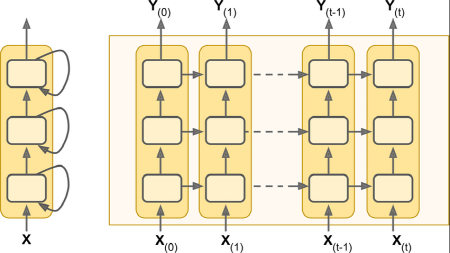

Just by stacking recurrent layers, we can simply make deep RNN.

In [13]:
model = keras.models.Sequential([ 
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

In [14]:
model.compile(optimizer="adam", loss="mse")
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 3s 9ms/step - loss: 0.0614
Epoch 2/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0108
Epoch 3/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0077
Epoch 4/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0071
Epoch 5/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0067
Epoch 6/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0066
Epoch 7/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0065
Epoch 8/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0064
Epoch 9/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0063
Epoch 10/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0064
Epoch 11/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0062
Epoch 12/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0063
Epoch 13/20
219/219 

In [15]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 1s 3ms/step - loss: 0.0064


0.00638963095843792

#### - Forecasting Multiple Time Step

How we can predict next 10 values? One method is to use print a value and adds it as input to trained model.

In [16]:
series = generate_time_series(1, n_steps + 10)
X_new, y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

y_pred = X[:, n_steps:]

In [17]:
y_pred

array([[[-0.5250353 ],
        [-0.4961463 ],
        [-0.4606766 ],
        [-0.44691664],
        [-0.4605504 ],
        [-0.48447728],
        [-0.4921031 ],
        [-0.4770032 ],
        [-0.44442856],
        [-0.40044904]]], dtype=float32)

In [29]:
X.shape

(1, 60, 1)

In [20]:
series.shape

(1, 60, 1)

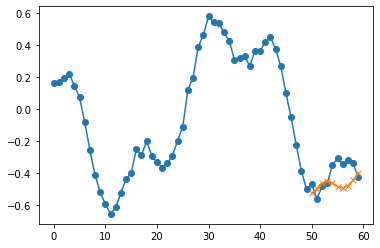

In [32]:
plt.plot(range(60), series.reshape(-1), marker='o')
plt.plot(range(50,60,1), y_pred.reshape(-1), marker='x')

Another method is to train RNN and predict next 10 values at once. Firsr change target to a 10 elements vector. 

In [33]:
series = generate_time_series(10000, n_steps + 10)
X_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10, 0]
X_test, y_test = series[9000:, n_steps], series[9000:, -10, 0]

In [36]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

In [37]:
model.compile(optimizer="adam", loss="mse")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 4s 11ms/step - loss: 0.1395 - val_loss: 0.0900
Epoch 2/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0867 - val_loss: 0.0812
Epoch 3/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0780 - val_loss: 0.0679
Epoch 4/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0712 - val_loss: 0.0821
Epoch 5/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0660 - val_loss: 0.0927
Epoch 6/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0615 - val_loss: 0.0876
Epoch 7/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0578 - val_loss: 0.0873
Epoch 8/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0564 - val_loss: 0.1034
Epoch 9/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0539 - val_loss: 0.0986
Epoch 10/20
219/219 [==============================] - 2s 10ms/step - loss: 0.0523 - val_loss: 0

In [38]:
y_pred = model.predict(X_new)

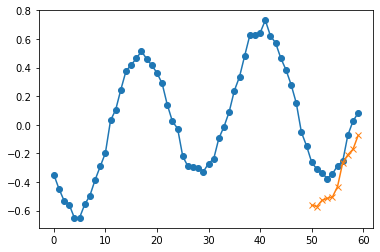

In [41]:
plt.plot(range(60), series.reshape(-1)[-60:], marker='o')
plt.plot(range(50,60,1), y_pred.reshape(-1), marker='x')

And we can train model that predict next 10 values in not only last step but also all step. change sequence-to-vector to sequence-to-sequence. Advantage of this method is all element about RNN output from all time step is included to loss. This says that more error gradient flows to model and it doesn't have to flow along time. It makes train stable and boosts train speed.

In [42]:
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10+1):
    Y[:,:, step_ahead - 1] = series[:, step_ahead:step_ahead + n_steps, 0]
y_train = Y[:7000]
y_valid = Y[7000:9000]
y_test = Y[9000:]

To change it sequence-to-sequence model, we have to set **return_sequence=True** to all recurrent layer. And apply output to Dense layer in all time step. Use **TiemDistributed** layer. It changes size of input to make model handle each time step like seperate sample.

In [43]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [44]:
model.compile(optimizer="adam", loss="mse")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 3s 9ms/step - loss: 0.1138 - val_loss: 0.0931
Epoch 2/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0866 - val_loss: 0.0856
Epoch 3/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0802 - val_loss: 0.0794
Epoch 4/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0721 - val_loss: 0.0697
Epoch 5/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0666 - val_loss: 0.0661
Epoch 6/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0639 - val_loss: 0.0658
Epoch 7/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0622 - val_loss: 0.0631
Epoch 8/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0616 - val_loss: 0.0623
Epoch 9/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0603 - val_loss: 0.0638
Epoch 10/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0600 - val_loss: 0.0611

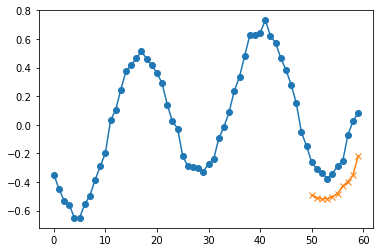

In [49]:
y_pred = model.predict(X_new)

plt.plot(range(60), series.reshape(-1)[-60:], marker='o')
plt.plot(range(50,60,1), y_pred[0,-1,:], marker='x')